# Step Attenuator
## Example E11 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example has multiple input variables with different distributions, including normal, uniform, t, and arcsine.

In [1]:
import suncal

In [2]:
u = suncal.UncertCalc.from_configfile('../ex_stepatten.yaml')
u.required_inputs  # What are the variables in the function?

['Ls', 'dL0a', 'dL0b', 'dLd', 'dLia', 'dLib', 'dLk', 'dLm', 'dLs']

In [3]:
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$Lx$   | GUM          | 30.043   | 0.022            | ± 0.044      | 1.982     | 110.9         |
|$Lx$   | Monte Carlo  | 30.043   | 0.022            | (30.006 , 30.081 ) | 1.669     | -             |

In [4]:
# Compare to Exhibit 16. Note NIST gives all values in STANDARD uncertainties. But input
# file defines them using shape parameters (width of uniform, etc.). Can check the
# conversions here.
u.out.report_inputs()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  |
|----------|---------|------------------|--------------|-------------|
|$Ls$   | 30.0402  | 0.0091            | 3.0       |              |
|$dL0a$   | 0.0  | 0.0020            | inf       |              |
|$dL0b$   | 0.0  | 0.0020            | inf       |              |
|$dLd$   | 0.0  | 0.0014           | inf      |              |
|$dLia$   | 0.0 | 0.00030           | inf      |              |
|$dLib$   | 0.0 | 0.00030           | inf      |              |
|$dLk$   | 0.0 | 0.0021           | inf      |              |
|$dLm$   | 0.0 | 0.020           | inf      |              |
|$dLs$   | 0.0030 | 0.0025           | inf      |              |

In [5]:
u.out.report_expanded(conflist=[.68, .95])

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$Lx$   | 99.00%     | 29.984   | 30.102   | 2.621     | 110.94         | 0.059               |
|-          | 95.00%     | 29.999   | 30.088   | 1.982     | 110.94         | 0.044               |
|-          | 90.00%     | 30.006   | 30.080   | 1.659     | 110.94         | 0.037               |
|-          | 68.00%     | 30.021   | 30.066  | 0.999     | 110.94         | 0.022              |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$Lx$   | 99.00%     | 30   | 30   | 2.140    |
|-          | 95.00%     | 30   | 30   | 1.669    |
|-          | 90.00%     | 30   | 30   | 1.487    |
|-          | 68.00%     | 30   | 30   | 1.095    |

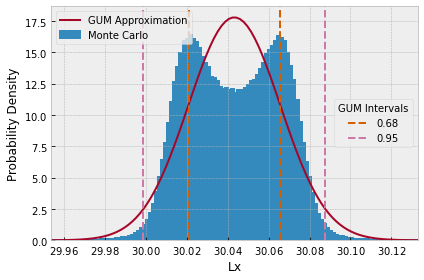

In [6]:
# Compare to Exhibit 17
u.out.plot_pdf(intervalsgum=[.68, .95]);